In [9]:
import leroi
import pyart
import proplot
import numpy as np

In [59]:
fn = '/g/data/kl02/jss548/lift_data/radar/qc_volumes/fbg_20230814_1210.qc.nc'
radar = pyart.io.read(fn) # read radar data

In [48]:
gs = [41, 301, 301] # number of grid points in z, y, x directions
gb = np.array([[0,2e4], [-1.5e5, 1.5e5], [-1.5e5, 1.5e5]]) # grid bounds in z, y, x directions
coords = [np.linspace(b[0], b[1], s) for b, s in zip(gb, gs)] # coordinate arrays

In [60]:
fields = ['reflectivity_horizontal'] # add more if you want!
radar = leroi.mask_invalid_data(radar, fields[0], add_to = fields, min_field = 0, min_area = 50)
grids = leroi.leroi_interp(radar, coords, fields, Rc = 1700, verbose=False)

/home/564/jb2354/miniforge3/lib/python3.10/site-packages/leroi-0.0.1-py3.10.egg/leroi/leroi.py:41: UserWarning: There are still missing heights despite filling.
        This means the grid is OUTSIDE the radar range!
/home/564/jb2354/miniforge3/lib/python3.10/site-packages/leroi-0.0.1-py3.10.egg/leroi/leroi.py:257: UserWarning: Some values are outside the interpolation range. These will be filled with NaN


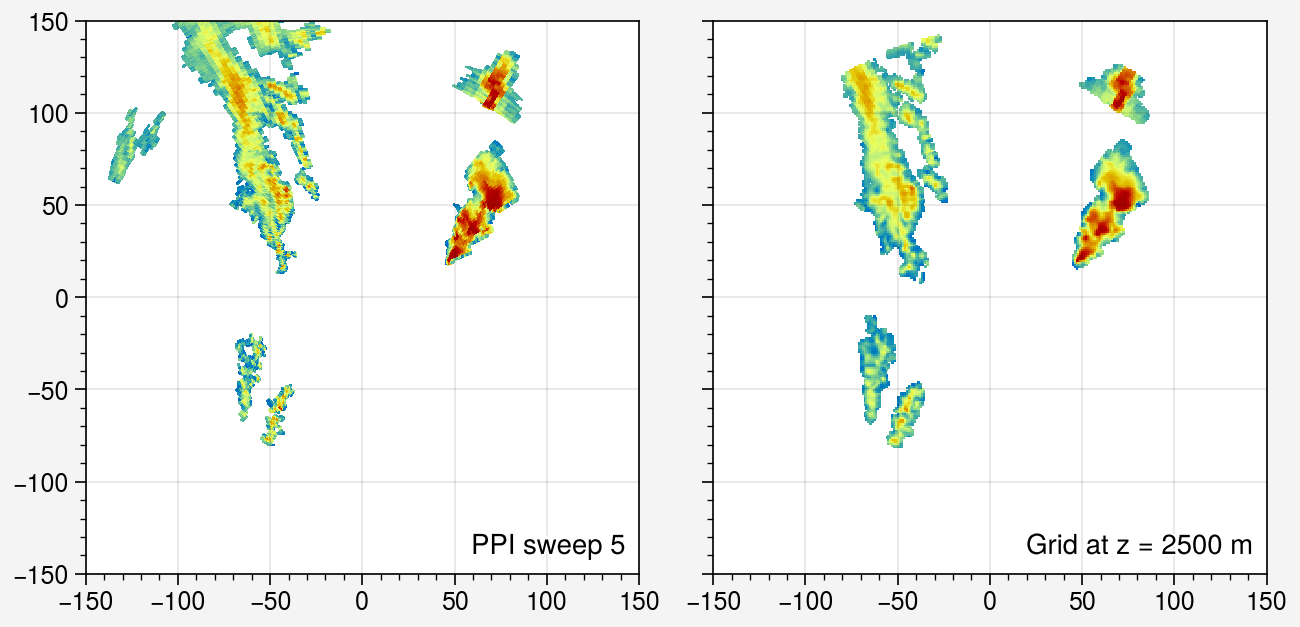

In [63]:
zidx = 5
el = 0.5
sweep = np.argmin(abs(el - radar.fixed_angle['data']))
kwargs = dict(vmin = 0, vmax = 50, cmap = 'pyart_homeyerrainbow', discrete = False)
xr, yr, zr = radar.get_gate_x_y_z(sweep)
fig, axs = plot.subplots(width = 6.5, ncols = 2)
axs[0].pcolormesh(xr/1e3, yr/1e3, radar.get_field(sweep, fields[0]), **kwargs)
axs[1].pcolormesh(coords[2]/1e3, coords[1]/1e3, grids[fields[0]]['data'][zidx], **kwargs)
axs.format(xlim = gb[2]/1e3, ylim  = gb[1]/1e3, grid= True)
axs[0].format(title = f'PPI sweep {sweep}', titleloc = 'lr')
axs[1].format(title = f'Grid at z = {coords[0][zidx]:.0f} m', titleloc = 'lr')
plot.show()